In [521]:
# Importing packages & libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [522]:
# set style
custom_style = {
    'figure.figsize': (6, 4),
    'axes.titlesize': 16,
    'axes.labelsize': 12,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'axes.grid': False,
    'grid.alpha': 0.53,
    'lines.linewidth': 2.5,
    'axes.facecolor': '#f5f5f5',
    'figure.facecolor': '#f5f5f5',
    'axes.titlecolor': '#f92e44'
}
plt.rcParams.update(custom_style)

## 1. Data Preprocessing & EDA

In [523]:
#Importing data
data = pd.read_csv('../data/laptop_price.csv', encoding = 'latin-1')
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [524]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [525]:
data.shape

(1303, 13)

There are 1303 rows in 12 columns

In [526]:
#Null values
data.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

No Missing values.

In [527]:
# removing 'GB' from 'Ram' column
data['Ram'] = data['Ram'].str.replace('GB', '').astype('int32')

In [528]:
# converting 'Weight' to 'float'
data['Weight'] = data['Weight'].str.replace('kg', '').astype('float32')

In [529]:
data.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94


In [530]:
data.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int32
Memory               object
Gpu                  object
OpSys                object
Weight              float32
Price_euros         float64
dtype: object

In [531]:
data.shape

(1303, 13)

### 1.1 Price (Target Column)

Text(0, 0.5, 'Count')

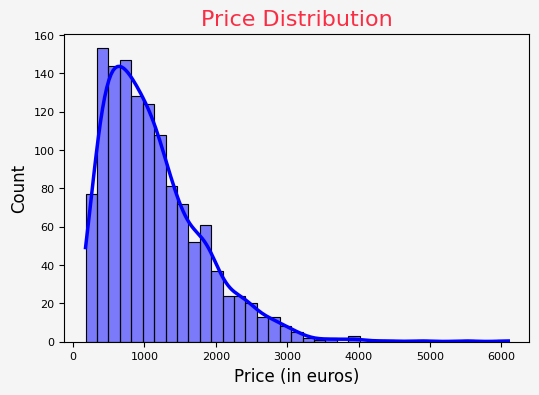

In [532]:
sns.histplot(data['Price_euros'], stat = 'count', color='blue', kde = True)
plt.title("Price Distribution")
plt.xlabel("Price (in euros)")
plt.ylabel("Count")

Most of the laptops are around 1000 euros.

In [533]:
# checking correlation
data.corr()['Price_euros']

laptop_ID      0.067830
Inches         0.068197
Ram            0.743007
Weight         0.210370
Price_euros    1.000000
Name: Price_euros, dtype: float64

### 1.2 Company

In [534]:
#Company
print(data['Company'].value_counts())
print("\nTotal No of diffetent types : ",len(data['Company'].value_counts()))

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

Total No of diffetent types :  19


Text(0, 0.5, 'Count')

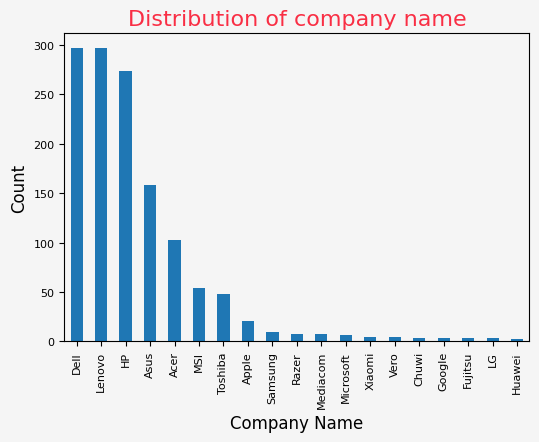

In [535]:
#distribution of company name
data['Company'].value_counts().plot(kind = 'bar')
plt.title('Distribution of company name')
plt.xlabel('Company Name')
plt.ylabel('Count')

Text(0, 0.5, 'Total Income')

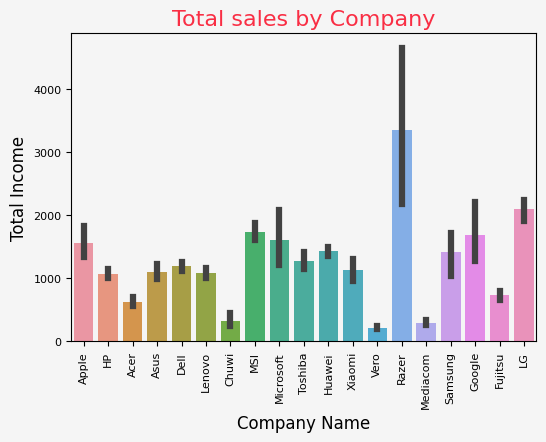

In [536]:
#Total sales by company
sns.barplot(x = data['Company'], y = data['Price_euros'])
plt.title('Total sales by Company')
plt.xlabel('Company Name')
plt.xticks(rotation='vertical')
plt.ylabel('Total Income')

Most of the income brom 'Razor' brand.
Combine all the companies which have sales less than 10 to one company as'Other'.

In [537]:
# Companies to replaced
replace_company = data['Company'].value_counts()
replace_company = replace_company[replace_company <= 10].index.tolist()

# Replace these companies with "Other"
data['Company'] = data['Company'].replace(replace_company, 'Other')

In [538]:
data['Company'].value_counts()

Dell       297
Lenovo     297
HP         274
Asus       158
Acer       103
MSI         54
Other       51
Toshiba     48
Apple       21
Name: Company, dtype: int64

### 1.3 Product

In [539]:
#Product
print(data['Product'].value_counts())
print("\nTotal No of diffetent types : ",len(data['Product'].value_counts()))

XPS 13                                     30
Inspiron 3567                              29
250 G6                                     21
Legion Y520-15IKBN                         19
Vostro 3568                                19
                                           ..
15-bw007nv (A10-9620P/6GB/128GB/Radeon      1
SmartBook 130                               1
A541NA-GO342 (N3350/4GB/500GB/Linux)        1
17-X047na (i3-6006U/8GB/1TB/W10)            1
V330-15IKB (i5-8250U/4GB/500GB/FHD/W10)     1
Name: Product, Length: 618, dtype: int64

Total No of diffetent types :  618


### 1.4 Type Name

In [540]:
#TypeName
print(data['TypeName'].value_counts())
print("\nTotal No of diffetent types : ",len(data['TypeName'].value_counts()))

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

Total No of diffetent types :  6


Text(0, 0.5, 'Count')

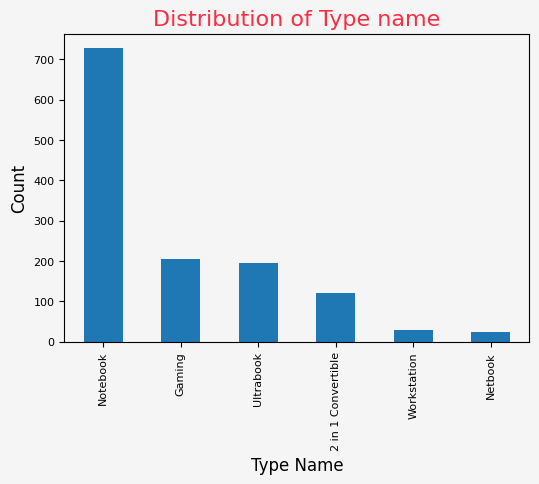

In [541]:
# distribution of TypeName
data['TypeName'].value_counts().plot(kind = 'bar')
plt.title('Distribution of Type name')
plt.xlabel('Type Name')
plt.ylabel('Count')

Text(0, 0.5, 'Total Income')

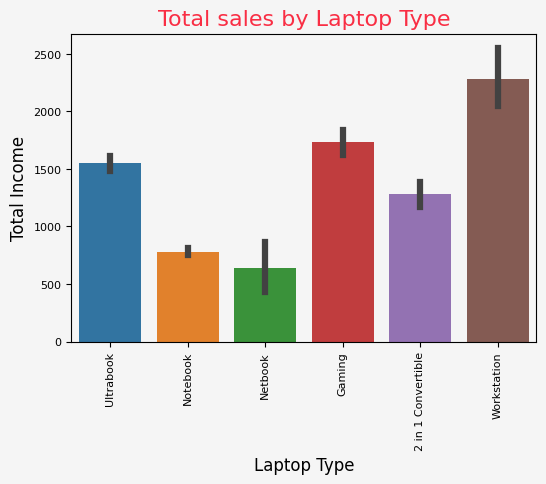

In [542]:
#Total sales by laptop type
sns.barplot(x = data['TypeName'], y = data['Price_euros'])
plt.title('Total sales by Laptop Type')
plt.xlabel('Laptop Type')
plt.xticks(rotation='vertical')
plt.ylabel('Total Income')

### 1.5 Screen Resolution

In [543]:
#ScreenResolution
print(data['ScreenResolution'].value_counts())
print("\nTotal No of diffetent types : ",len(data['ScreenResolution'].value_counts()))

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [544]:
# Extact 'Touchscrren'  & 'IPS'
data['Touchscreen'] = data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
data['IPS'] = data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [545]:
data['Touchscreen'].value_counts()

0    1111
1     192
Name: Touchscreen, dtype: int64

Text(0, 0.5, 'Count')

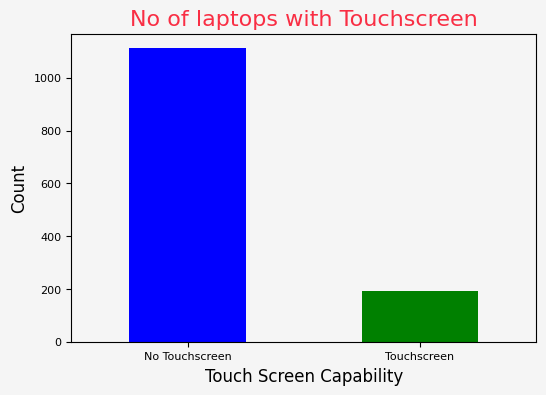

In [546]:
ax = data['Touchscreen'].value_counts().plot(kind='bar', color=['blue', 'green'])
colors = {0: 'blue', 1: 'green'}
labels = {0: 'No Touchscreen', 1: 'Touchscreen'}
plt.title('No of laptops with Touchscreen')
plt.xlabel('Touch Screen Capability')
plt.xticks(list(colors.keys()), list(labels.values()), rotation='horizontal')  
plt.ylabel('Count')

In [547]:
data['IPS'].value_counts()

0    938
1    365
Name: IPS, dtype: int64

Text(0, 0.5, 'Count')

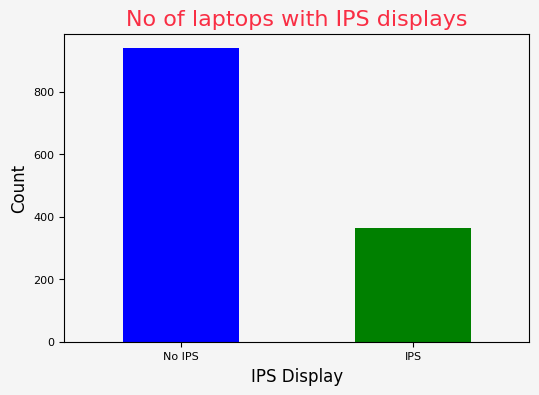

In [548]:
ax = data['IPS'].value_counts().plot(kind='bar', color=['blue', 'green'])
colors = {0: 'blue', 1: 'green'}
labels = {0: 'No IPS', 1: 'IPS'}
plt.title('No of laptops with IPS displays')
plt.xlabel('IPS Display')
plt.xticks(list(colors.keys()), list(labels.values()), rotation='horizontal')  
plt.ylabel('Count')

In [549]:
# Extract resolution 'X-axis' and 'Y-axis'

In [550]:
temp = data['ScreenResolution'].str.split('x', n =1, expand = True)
data['X_res'] = temp[0]
data['Y_res'] = temp[1]

In [551]:
data.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,X_res,Y_res
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,IPS Panel Retina Display 2560,1600
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900


In [552]:
data['X_res'] = data['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [553]:
data['X_res'] = data['X_res'].astype('int')
data['Y_res'] = data['Y_res'].astype('int')

In [554]:
#ppi
data['ppi'] = (((data['X_res']**2)+(data['Y_res']**2))**0.5/data['Inches']).astype('float')

In [555]:
data.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,X_res,Y_res,ppi
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600,226.983005
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900,127.677940


### 1.6 CPU

In [468]:
# Cpu
#ScreenResolution
print(data['Cpu'].value_counts())
print("\nTotal No of diffetent types : ",len(data['Cpu'].value_counts()))

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

Total No of diffetent types :  118


In [469]:
data['Cpu_name'] = data['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [470]:
data['Cpu_name'].value_counts()

Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1
AMD A6-S

In [471]:
# Categorize in to 5 categories--> 'Intel Core i5', 'Intel Core i3', 'Intel Core i6', 'AMD', 'Other'
def set_processor(name):
    if name == 'Intel Core i7' or name == 'Intel Core i5' or name == 'Intel Core i3' :
        return name
    else:
        if name.split()[0] == 'AMD':
            return 'AMD'
        else:
            return 'Other'

data['Cpu_name']  = data['Cpu_name'].apply(set_processor)

In [472]:
data['Cpu_name'].value_counts()

Intel Core i7    527
Intel Core i5    423
Other            155
Intel Core i3    136
AMD               62
Name: Cpu_name, dtype: int64

Text(0, 0.5, 'Count')

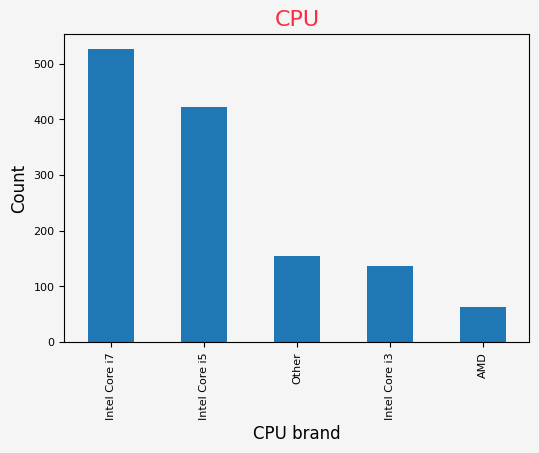

In [473]:
data['Cpu_name'].value_counts().plot(kind='bar')
plt.title('CPU')
plt.xlabel('CPU brand')
plt.ylabel('Count')

Text(0, 0.5, 'Total Income')

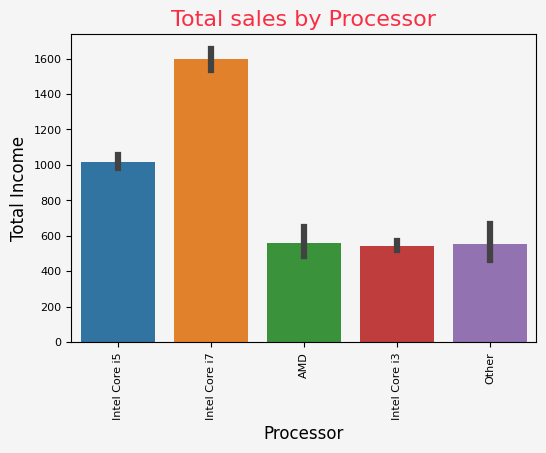

In [474]:
#Total income by processor
sns.barplot(x = data['Cpu_name'], y = data['Price_euros'])
plt.title('Total sales by Processor')
plt.xlabel('Processor')
plt.xticks(rotation='vertical')
plt.ylabel('Total Income')

### 1.7 GPU

In [475]:
#GPU
print(data['Gpu'].value_counts())
print("\nTotal No of diffetent types : ",len(data['Gpu'].value_counts()))

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

Total No of diffetent types :  110


In [476]:
data['Gpu_name'] = data['Gpu'].apply(lambda x:" ".join(x.split()[0:1])) 

In [477]:
data['Gpu_name'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu_name, dtype: int64

In [478]:
#Remove 'ARM'
data = data[data['Gpu_name'] != 'ARM']

Text(0, 0.5, 'Total Income')

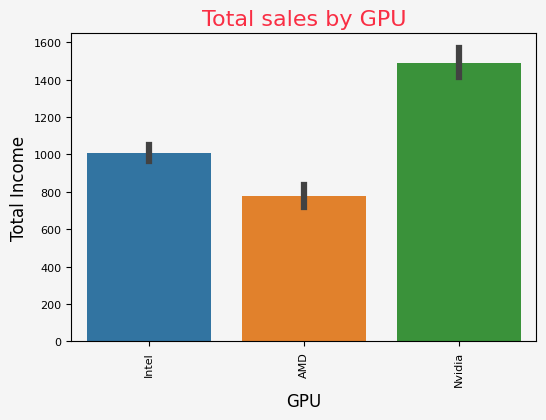

In [479]:
#Total income by GPU
sns.barplot(x = data['Gpu_name'], y = data['Price_euros'])
plt.title('Total sales by GPU')
plt.xlabel('GPU')
plt.xticks(rotation='vertical')
plt.ylabel('Total Income')

### 1.8 Operating System 

In [480]:
#OpSys
print(data['OpSys'].value_counts())
print("\nTotal No of diffetent types : ",len(data['OpSys'].value_counts()))

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

Total No of diffetent types :  9


In [481]:
# Consider 4 categories --> 'Windows', 'macOS', 'Linux', 'Other'
def set_os(input):
    if input == 'Windows 10' or input == 'Windows 7' or input == 'Windows 10 S':
        return 'Windows'
    elif input == 'macOS' or input == 'Mac OS X':
        return 'Mac'
    elif input == 'Linux':
        return input
    else:
        return 'Other'

data['OpSys'] = data['OpSys'].apply(set_os)

In [482]:
#OpSys
print(data['OpSys'].value_counts())

Windows    1125
Other        94
Linux        62
Mac          21
Name: OpSys, dtype: int64


Text(0, 0.5, 'Total Income')

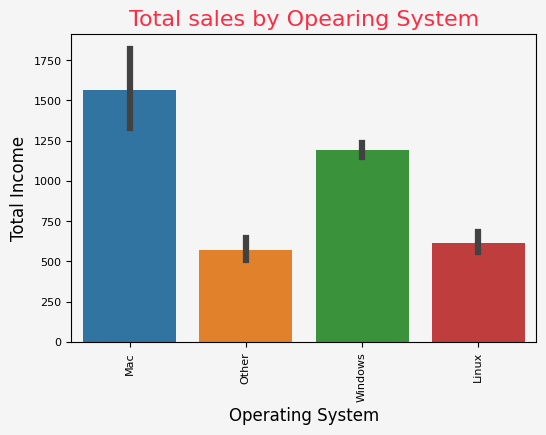

In [483]:
#Total income by OS
sns.barplot(x = data['OpSys'], y = data['Price_euros'])
plt.title('Total sales by Opearing System')
plt.xlabel('Operating System')
plt.xticks(rotation='vertical')
plt.ylabel('Total Income')

### 1.9 RAM

Text(0, 0.5, 'Total Income')

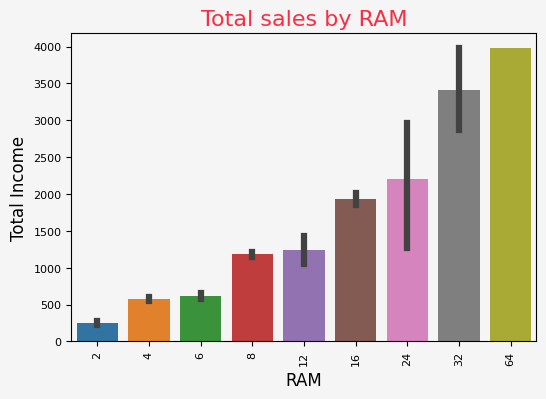

In [484]:
#Total income by RAM
sns.barplot(x = data['Ram'], y = data['Price_euros'])
plt.title('Total sales by RAM')
plt.xlabel('RAM')
plt.xticks(rotation='vertical')
plt.ylabel('Total Income')

In [485]:
print(data['Ram'].value_counts())

8     619
4     374
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: Ram, dtype: int64


### 1.10 Memory

In [486]:
print(data['Memory'].value_counts())

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [487]:
data['Memory'] = data['Memory'].astype(str).replace('\.0','', regex = True)

In [488]:
data['Memory'] = data['Memory'].str.replace('GB', '')
data['Memory'] = data['Memory'].str.replace('TB', '000')

In [489]:
new = data['Memory'].str.split('+', n = 1, expand = True)
data['first'] = new[0]
data['first'] = data['first'].str.strip()

In [490]:
data['second'] = new[1]

In [491]:
data['Layer1HDD'] = data['first'].apply(lambda x: 1 if "HDD" in x else 0)
data['Layer1SSD'] = data['first'].apply(lambda x: 1 if "SSD" in x else 0)
data['Layer1Hybrid'] = data['first'].apply(lambda x: 1 if "Hybrid" in x else 0)
data['Layer1Flash_storage'] = data['first'].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [492]:
data.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,Y_res,ppi,Cpu_name,Gpu_name,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_storage
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,...,1600,226.983005,Intel Core i5,Intel,128 SSD,None,0,1,0,0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,...,900,127.677940,Intel Core i5,Intel,128 Flash Storage,None,0,0,0,1


In [493]:
data['first'] = data['first'].str.replace(r'\D', '')

In [494]:
data['second'].fillna("0", inplace=True)

In [495]:
data['Layer2HDD'] = data['second'].apply(lambda x: 1 if "HDD" in x else 0)
data['Layer2SSD'] = data['second'].apply(lambda x: 1 if "SSD" in x else 0)
data['Layer2Hybrid'] = data['second'].apply(lambda x: 1 if "Hybrid" in x else 0)
data['Layer2Flash_storage'] = data['second'].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [496]:
data['second'] = data['second'].str.replace(r'\D', '')

In [497]:
data['first'] = data['first'].astype(int)

In [498]:
data['second'] = data['second'].astype(int)

In [499]:
data['HDD'] =(data['first']*data['Layer1HDD']+data['second']*data['Layer2HDD'])
data['SSD'] =(data['first']*data['Layer1SSD']+data['second']*data['Layer2SSD'])
data['Hybrid'] =(data['first']*data['Layer1Hybrid']+data['second']*data['Layer2Hybrid'])
data['Flash_Storage'] =(data['first']*data['Layer1Flash_storage']+data['second']*data['Layer2Flash_storage'])

In [500]:
data.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,Layer1Hybrid,Layer1Flash_storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_storage,HDD,SSD,Hybrid,Flash_Storage
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,...,0,0,0,0,0,0,0,128,0,0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,...,0,1,0,0,0,0,0,0,0,128


In [501]:
data.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_storage', 
                  'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash_storage'], inplace = True)

In [502]:
data.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,IPS,X_res,Y_res,ppi,Cpu_name,Gpu_name,HDD,SSD,Hybrid,Flash_Storage
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,...,1,2560,1600,226.983005,Intel Core i5,Intel,0,128,0,0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,...,0,1440,900,127.677940,Intel Core i5,Intel,0,0,0,128


In [503]:
#HDD
data['HDD'].value_counts()

0       726
1000    408
500     134
2000     32
32        1
128       1
Name: HDD, dtype: int64

In [504]:
#drop laptops HDD is 32GB and 128GB
counts = data['HDD'].transform(lambda x: data['HDD'].value_counts()[x])
data = data[counts >= 10]

Text(0, 0.5, 'Count')

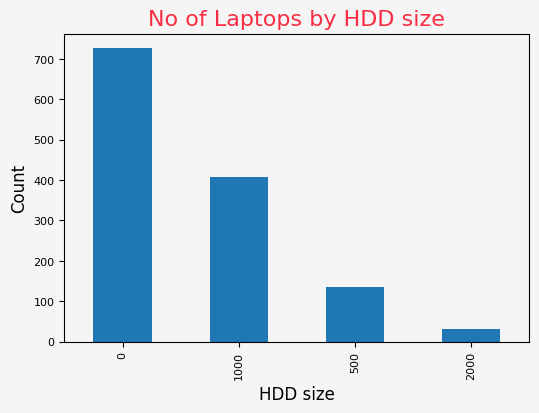

In [505]:
# No of laptops by HDD size
data['HDD'].value_counts().plot(kind='bar')
plt.title('No of Laptops by HDD size')
plt.xlabel('HDD size')
plt.ylabel('Count')

Text(0, 0.5, 'Total Income')

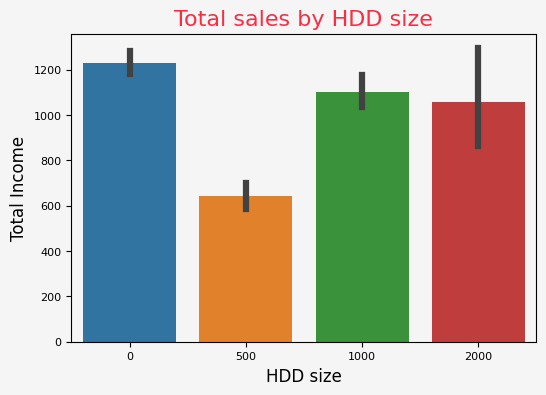

In [506]:
#Total income by SSD
sns.barplot(x = data['HDD'], y = data['Price_euros'])
plt.title('Total sales by HDD size')
plt.xlabel('HDD size')
plt.ylabel('Total Income')

In [507]:
#SSD
data['SSD'].value_counts()

256     498
0       457
128     172
512     138
1000     16
32        6
180       5
16        3
64        1
1024      1
768       1
240       1
8         1
Name: SSD, dtype: int64

In [508]:
#drop laptops SSDs Less than 128GB
count_ssd = data['SSD'].transform(lambda x: data['SSD'].value_counts()[x])
data = data[count_ssd >= 10]

Text(0, 0.5, 'Count')

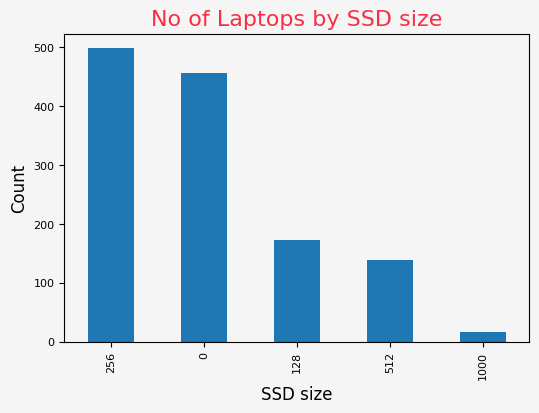

In [509]:
data['SSD'].value_counts().plot(kind='bar')
plt.title('No of Laptops by SSD size')
plt.xlabel('SSD size')
plt.ylabel('Count')

Text(0, 0.5, 'Total Income')

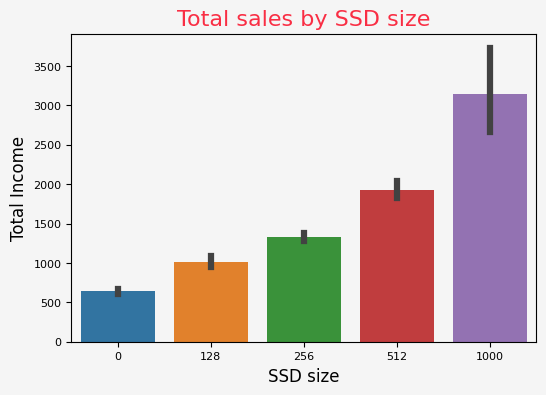

In [510]:
#Total income by SSD
sns.barplot(x = data['SSD'], y = data['Price_euros'])
plt.title('Total sales by SSD size')
plt.xlabel('SSD size')
plt.ylabel('Total Income')

In [511]:
# Hybrid 
data['Hybrid'].value_counts()

0       1269
1000      11
508        1
Name: Hybrid, dtype: int64

In [512]:
# Flash_storage
data['Flash_Storage'].value_counts()

0      1207
32       37
64       16
256       8
16        7
128       4
512       2
Name: Flash_Storage, dtype: int64

In [513]:
# checking correlation
data.corr()['Price_euros']

laptop_ID        0.066303
Inches           0.061790
Ram              0.744423
Weight           0.209332
Price_euros      1.000000
Touchscreen      0.188983
IPS              0.260421
X_res            0.553798
Y_res            0.551423
ppi              0.473439
HDD             -0.103888
SSD              0.676247
Hybrid           0.007370
Flash_Storage   -0.041570
Name: Price_euros, dtype: float64

In [514]:
# Remove variables
# 'laptop_ID' & 'Inches' --> useless
# 'Product' --> Too many products , so the effect of the product is less.
# ScreenResolution --> Only consider Touch capability and IPS
# Cpu --> Since we make 'Cpu_name' column
# Gpu --> Since we make 'Gpu_name' column
# X_res, Y_res, Inches --> Since we use the relationship between these 3 variables and found 'ppi'
# Memory
#Hybrid, Flash_Storage --> Low correlation with price 
# Weight
data = data.drop(['laptop_ID', 'Inches', 'Product', 'ScreenResolution', 'Weight','X_res', 'Y_res', 'Cpu', 'Gpu', 'Memory', 'Hybrid', 'Flash_Storage'], axis=1)

In [515]:
data.head(5)

,Company,TypeName,Ram,OpSys,Price_euros,Touchscreen,IPS,ppi,Cpu_name,Gpu_name,HDD,SSD
0,Apple,Ultrabook,8,Mac,1339.69,0,1,226.983005,Intel Core i5,Intel,0,128
1,Apple,Ultrabook,8,Mac,898.94,0,0,127.677940,Intel Core i5,Intel,0,0
2,HP,Notebook,8,Other,575.00,0,0,141.211998,Intel Core i5,Intel,0,256
3,Apple,Ultrabook,16,Mac,2537.45,0,1,220.534624,Intel Core i7,AMD,0,512
4,Apple,Ultrabook,8,Mac,1803.60,0,1,226.983005,Intel Core i5,Intel,0,256


In [516]:
# one-hot encoding
data = pd.get_dummies(data)

In [517]:
data.head(5)

,Ram,Price_euros,Touchscreen,IPS,ppi,HDD,SSD,Company_Acer,Company_Apple,Company_Asus,...,OpSys_Other,OpSys_Windows,Cpu_name_AMD,Cpu_name_Intel Core i3,Cpu_name_Intel Core i5,Cpu_name_Intel Core i7,Cpu_name_Other,Gpu_name_AMD,Gpu_name_Intel,Gpu_name_Nvidia
0,8,1339.69,0,1,226.983005,0,128,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,8,898.94,0,0,127.677940,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,8,575.00,0,0,141.211998,0,256,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,16,2537.45,0,1,220.534624,0,512,0,1,0,...,0,0,0,0,0,1,0,1,0,0
4,8,1803.60,0,1,226.983005,0,256,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [518]:
data.shape

(1281, 34)

In [519]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1281 entries, 0 to 1302
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ram                          1281 non-null   int32  
 1   Price_euros                  1281 non-null   float64
 2   Touchscreen                  1281 non-null   int64  
 3   IPS                          1281 non-null   int64  
 4   ppi                          1281 non-null   float64
 5   HDD                          1281 non-null   int64  
 6   SSD                          1281 non-null   int64  
 7   Company_Acer                 1281 non-null   uint8  
 8   Company_Apple                1281 non-null   uint8  
 9   Company_Asus                 1281 non-null   uint8  
 10  Company_Dell                 1281 non-null   uint8  
 11  Company_HP                   1281 non-null   uint8  
 12  Company_Lenovo               1281 non-null   uint8  
 13  Company_MSI       

In [520]:
#exporting processed dataset
data.to_csv('../data/laptop_price_processed.csv', index=False)